In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

G = nx.read_gpickle('github.p')

# Draw the graph to screen
#nx.draw(G)
#plt.show()

In [ ]:
# Import necessary modules# Impor 
import matplotlib.pyplot as plt
from nxviz import CircosPlot

# Create the CircosPlot object: c
c = CircosPlot(T)

# Draw c to the screen
c.draw()

# Display the plot
plt.show()

**The bipartite keyword**

In [ ]:
# Define get_nodes_from_partition()
def get_nodes_from_partition(G, partition):
    # Initialize an empty list for nodes to be returned
    nodes = []
    # Iterate over each node in the graph G
    for n in G.nodes():
        # Check that the node belongs to the particular partition
        if G.node[n]['bipartite'] == partition:
            # If so, append it to the list of nodes
            nodes.append(n)
    return nodes

# Print the number of nodes in the 'projects' partition
print(len(get_nodes_from_partition(G, 'projects')))

# Print the number of nodes in the 'users' partition
print(len(get_nodes_from_partition(G, 'users')))

**Degree centrality distribution of user nodes**

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Get the 'users' nodes: user_nodes
user_nodes = get_nodes_from_partition(G, 'users')

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(G)

# Get the degree centralities for user_nodes: user_dcs
user_dcs = [dcs[n] for n in user_nodes]

# Plot the degree distribution of users_dcs
plt.yscale('log')
plt.hist(user_dcs, bins=20)
plt.show()

**Degree centrality distribution of project nodes**

In [ ]:
# Get the 'projects' nodes: project_nodes
project_nodes = get_nodes_from_partition(G, 'projects')

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(G)

# Get the degree centralities for project_nodes: project_dcs
project_dcs = [dcs[n] for n in project_nodes]

# Plot the degree distribution of project_dcs
plt.yscale('log')
plt.hist(project_dcs, bins=20)
plt.show()

**Shared nodes in other partition**

In [ ]:
def shared_partition_nodes(G, node1, node2):
    # Check that the nodes belong to the same partition
    assert G.node[node1]['bipartite'] == G.node[node2]['bipartite']

    # Get neighbors of node 1: nbrs1
    nbrs1 = G.neighbors(node1)
    # Get neighbors of node 2: nbrs2
    nbrs2 = G.neighbors(node2)

    # Compute the overlap using set intersections
    overlap = set(nbrs1).intersection(nbrs2)
    return overlap

# Print the number of shared repositories between users 'u7909' and 'u2148'
print(len(shared_partition_nodes(G, 'u7909', 'u2148')))
print(shared_partition_nodes(G, 'u7909', 'u2148'))

**User similarity metric**

Having written a function to calculate the set of nodes that are shared between two nodes, you're now going to write a function to compute a metric of similarity between two users: the number of projects shared between two users divided by the total number of nodes in the other partition. This can then be used to find users that are similar to one another.

In [ ]:
def user_similarity(G, user1, user2, proj_nodes):
    # Check that the nodes belong to the 'users' partition
    assert G.node[user1]['bipartite'] == 'users'
    assert G.node[user2]['bipartite'] == 'users'

    # Get the set of nodes shared between the two users
    shared_nodes = shared_partition_nodes(G, user1, user2)

    # Return the fraction of nodes in the projects partition
    return len(shared_nodes) / len(proj_nodes)

# Compute the similarity score between users 'u4560' and 'u1880'
project_nodes = get_nodes_from_partition(G, 'projects')
similarity_score = user_similarity(G, 'u4560', 'u1880', project_nodes)

print(similarity_score)

**Find similar users**

In [ ]:
from collections import defaultdict

def most_similar_users(G, user, user_nodes, proj_nodes):
    # Data checks
    assert G.node[user]['bipartite'] == 'users'

    # Get other nodes from user partition
    user_nodes = set(user_nodes)
    user_nodes.remove(user)

    # Create the dictionary: similarities
    similarities = defaultdict(list)
    for n in user_nodes:
        similarity = user_similarity(G, user, n, proj_nodes)
        similarities[similarity].append(n)

    # Compute maximum similarity score: max_similarity
    max_similarity = max(similarities.keys())

    # Return list of users that share maximal similarity
    return similarities[max_similarity]

user_nodes = get_nodes_from_partition(G, 'users')
project_nodes = get_nodes_from_partition(G, 'projects')

print(most_similar_users(G, 'u4560', user_nodes, project_nodes))

**Recommend repositories**

In [ ]:
def recommend_repositories(G, from_user, to_user):
    # Get the set of repositories that from_user has contributed to
    from_repos = set(G.neighbors(from_user))
    # Get the set of repositories that to_user has contributed to
    to_repos = set(G.neighbors(to_user))

    # Identify repositories that the from_user is connected to that the to_user is not connected to
    return from_repos.difference(to_repos)

# Print the repositories to be recommended
print(recommend_repositories(G, 'u7909', 'u2148'))

**Reading graphs**

In [ ]:
# Import networkx
import networkx as nx


G = nx.read_edgelist('american-revolution_1.txt', data=True)

# Assign nodes to 'clubs' or 'people' partitions
for n, d in G.nodes(data=True):
    if '.' in n:
        G.node[n]['bipartite'] = 'people'
    else:
        G.node[n]['bipartite'] = 'clubs'
        
# Print the edges of the graph
print(G.nodes())


**Computing projections**

In [ ]:
# Prepare the nodelists needed for computing projections: people, clubs
people = [n for n in G.nodes() if G.node[n]['bipartite'] == 'people']
clubs = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'clubs']

# Compute the people and clubs projections: peopleG, clubsG
peopleG = nx.bipartite.projected_graph(G, people)
clubsG = nx.bipartite.projected_graph(G, clubs)

**Plot degree centrality on projection**

In [ ]:
import matplotlib.pyplot as plt 

# Plot the degree centrality distribution of both node partitions from the original graph
plt.figure()
original_dc = nx.bipartite.degree_centrality(G, people)
plt.hist(list(original_dc.values()), alpha=0.5)
plt.yscale('log')
plt.title('Bipartite degree centrality')
plt.show()


# Plot the degree centrality distribution of the peopleG graph
plt.figure()  
people_dc = nx.degree_centrality(peopleG)
plt.hist(list(people_dc.values()))
plt.yscale('log')
plt.title('Degree centrality of people partition')
plt.show()

# Plot the degree centrality distribution of the clubsG graph
plt.figure() 
clubs_dc = nx.degree_centrality(clubsG)
plt.hist(list(clubs_dc.values()))
plt.yscale('log')
plt.title('Degree centrality of clubs partition')
plt.show()

**Compute adjacency matrix**

In [ ]:
# Get the list of people and list of clubs from the graph: people_nodes, clubs_nodes
people_nodes = get_nodes_from_partition(G, 'people')
clubs_nodes = get_nodes_from_partition(G, 'clubs')

# Compute the biadjacency matrix: bi_matrix
bi_matrix = nx.bipartite.biadjacency_matrix(G, row_order=people_nodes, column_order=clubs_nodes)

# Compute the user-user projection: user_matrix
user_matrix = bi_matrix @ bi_matrix.T

print(user_matrix)

**Find shared membership: Transposition**

In [ ]:
import numpy as np

# Find out the names of people who were members of the most number of clubs
diag = user_matrix.diagonal() 
indices = np.where(diag == diag.max())[0]  
print('Number of clubs: {0}'.format(diag.max()))
print('People with the most number of memberships:')
for i in indices:
    print('- {0}'.format(people_nodes[i]))

# Set the diagonal to zero and convert it to a coordinate matrix format
user_matrix.setdiag(0)
users_coo = user_matrix.tocoo()

# Find pairs of users who shared membership in the most number of clubs
indices = np.where(users_coo.data == users_coo.data.max())[0]
print('People with most number of shared memberships:')
for idx in indices:
    print('- {0}, {1}'.format(people_nodes[users_coo.row[idx]], people_nodes[users_coo.col[idx]]))  

**Make nodelist (DataFrames and csv)**

In [ ]:
# Initialize a list to store each edge as a record: nodelist
nodelist = list()
for n, d in G_people.nodes(data=True):
    # nodeinfo stores one "record" of data as a dict
    nodeinfo = {'person': n} 
    
    # Update the nodeinfo dictionary 
    nodeinfo.update(d)
    
    # Append the nodeinfo to the node list
    nodelist.append(nodeinfo)
    

# Create a pandas DataFrame of the nodelist: node_df
node_df = pd.DataFrame(nodelist)
print(node_df.head())

**Make edgelist (DataFrames an csv)**

In [ ]:
# Initialize a list to store each edge as a record: edgelist
edgelist = []
for n1, n2, d in G_people.edges(data=True):
    # Initialize a dictionary that shows edge information: edgeinfo
    edgeinfo = {'node1':n1, 'node2':n2}
    
    # Update the edgeinfo data with the edge metadata
    edgeinfo.update(d)
    
    # Append the edgeinfo to the edgelist
    edgelist.append(edgeinfo)
    
# Create a pandas DataFrame of the edgelist: edge_df
edge_df = pd.DataFrame(edgelist)
print(edge_df.head())

# Comparing graphs & time-dynamic graphs

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.read_gpickle('uci-forum.p')

# Draw the graph to screen
#nx.draw(G)
#plt.show()

**List of graphs**

In [ ]:
import networkx as nx 

months = range(4, 11)

# Initialize an empty list: Gs
Gs = [] 
for month in months:
    # Instantiate a new undirected graph: G
    G = nx.Graph()
    
    # Add in all nodes that have ever shown up to the graph
    G.add_nodes_from(data['sender'])
    G.add_nodes_from(data['recipient'])
    
    # Filter the DataFrame so that there's only the given month
    df_filtered = data[data['month'] == month]
    
    # Add edges from filtered DataFrame
    G.add_edges_from(zip(df_filtered['sender'],df_filtered['recipient']))
    
    
    # Append G to the list of graphs
    Gs.append(G)
    
print(len(Gs))

**Graph differences over time**

In [ ]:
import networkx as nx  
# Instantiate a list of graphs that show edges added: added
added = []
# Instantiate a list of graphs that show edges removed: removed
removed = []
# Here's the fractional change over time
fractional_changes = []
window = 1  
i = 0      

for i in range(len(Gs) - window):
    g1 = Gs[i]
    g2 = Gs[i + window]
        
    # Compute graph difference here
    added.append(nx.difference(g2,g1))   
    removed.append(nx.difference(g1,g2))
    
    # Compute change in graph size over time
    fractional_changes.append((len(g2.edges()) - len(g1.edges())) / len(g1.edges()))
    
# Print the fractional change
print(fractional_changes)

**Plot number of edge changes over time**

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

# Plot the number of edges added over time
edges_added = [len(g.edges()) for g in added]
plot1 = ax1.plot(edges_added, label='added', color='orange')

# Plot the number of edges removed over time
edges_removed = [len(g.edges()) for g in removed]
plot2 = ax1.plot(edges_removed, label='removed', color='purple')

# Set yscale to logarithmic scale
ax1.set_yscale('log')  
ax1.legend()

# 2nd axes shares x-axis with 1st axes object
ax2 = ax1.twinx()

# Plot the fractional changes over time
plot3 = ax2.plot(fractional_changes, label='fractional change', color='green')

# Here, we create a single legend for both plots
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)
plt.axhline(0, color='green', linestyle='--')
plt.show()

**Number of edges over time**

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()

# Create a list of the number of edges per month
edge_sizes = [len(g.edges()) for g in Gs]

# Plot edge sizes over time
plt.plot(edge_sizes)
plt.xlabel('Time elapsed from first month (in months).') 
plt.ylabel('Number of edges')                           
plt.show() 

**Degree centrality over time**

In [ ]:
# Import necessary modules
import networkx as nx
import matplotlib.pyplot as plt

# Create a list of degree centrality scores month-by-month
cents = []
for G in Gs:
    cent = nx.degree_centrality(G)
    cents.append(cent)


# Plot ECDFs over time
fig = plt.figure()
for i in range(len(cents)):
    x, y = ECDF(cents[i].values()) 
    plt.plot(x, y, label='Month {0}'.format(i+1)) 
plt.legend()   
plt.show()

**Find nodes with top degree centralities**

In [ ]:
# Get the top 5 unique degree centrality scores: top_dcs
top_dcs = sorted(set(nx.degree_centrality(G).values()), reverse=True)[:5]

# Create list of nodes that have the top 5 highest overall degree centralities
top_connected = []
for n, dc in nx.degree_centrality(G).items():
    if dc in top_dcs:
        top_connected.append(n)
        
# Print the number of nodes that share the top 5 degree centrality scores
print(len(top_connected))

**Visualizing connectivity**

In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt
from collections import defaultdict

# Create a defaultdict in which the keys are nodes and the values are a list of connectivity scores over time
connectivity = defaultdict(list)
for n in top_connected:
    for g in Gs:
        connectivity[n].append(len(g.neighbors(n)))

# Plot the connectivity for each node
fig = plt.figure() 
for n, conn in connectivity.items(): 
    plt.plot(conn, label=n) 
plt.legend()  
plt.show()

# Case study

** Create a graph from the pandas DataFrame**

In [1]:
import networkx as nx
import pandas as pd

# load student forumns
G = nx.read_gpickle('uci-forum_1.p')

# # in case to to be created from pandas dataframe
# import networkx as nx

# # Instantiate a new Graph: G
# G = nx.Graph()

# # Add nodes from each of the partitions
# G.add_nodes_from(data['student'], bipartite = 'student')
# G.add_nodes_from(data['forum'], bipartite = 'forum')

# # Add in each edge along with the date the edge was created
# for r, d in data.iterrows():
#     G.add_edge(d['student'], d['forum'], date=d['date'])

c:\programdata\anaconda3\lib\site-packages\networkx\readwrite\gpickle.py:95: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  return pickle.load(path)


**Visualize the degree centrality distribution of the students projection**

In [2]:
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Get the student partition's nodes: student_nodes
student_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'student']

# Create the students nodes projection as a graph: G_students
G_students = nx.bipartite.projected_graph(G, nodes=student_nodes)

# Calculate the degree centrality using nx.degree_centrality: dcs
dcs = nx.degree_centrality(G_students)

# Plot the histogram of degree centrality values
plt.hist(list(dcs.values()), alpha=0.5, histtype='bar', ec='black')
plt.ylabel('# of students')
plt.xlabel('degree centrality')
plt.title('Degree centrality of students projection')
plt.show() 

<Figure size 640x480 with 1 Axes>

**Visualize the degree centrality distribution of the forums projection**

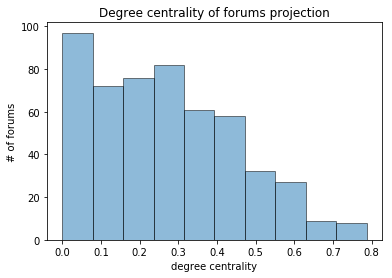

In [3]:
# Import necessary modules
import matplotlib.pyplot as plt 
import networkx as nx

# Get the forums partition's nodes: forum_nodes
forum_nodes = [n for n, d in G.nodes(data=True) if d['bipartite']=='forum']

# Create the forum nodes projection as a graph: G_forum
G_forum = nx.bipartite.projected_graph(G, nodes=forum_nodes)

# Calculate the degree centrality using nx.degree_centrality: dcs
dcs = nx.degree_centrality(G_forum)

# Plot the histogram of degree centrality values
# Plot the histogram of degree centrality values
plt.hist(list(dcs.values()), alpha=0.5, histtype='bar', ec='black')
plt.ylabel('# of forums')
plt.xlabel('degree centrality')
plt.title('Degree centrality of forums projection')
plt.show() 

**Time filter on edges**

In [4]:
import networkx as nx
from datetime import datetime

# Instantiate a new graph: G_sub
G_sub = nx.Graph()

# Add nodes from the original graph
G_sub.add_nodes_from(G.nodes(data=True))

# Add edges using a list comprehension with one conditional on the edge dates, that the date of the edge is earlier than 2004-05-16.
G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] < datetime(2004,5,16)])

**Visualize filtered graph using nxviz**

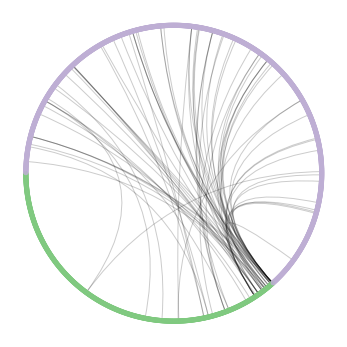

In [5]:
# Import necessary modules
from nxviz import CircosPlot
import networkx as nx
import matplotlib.pyplot as plt

# Compute degree centrality scores of each node
dcs = nx.bipartite.degree_centrality(G, nodes=forum_nodes)
for n, d in G_sub.nodes(data=True):
    G_sub.node[n]['dc'] = dcs[n]

# Create the CircosPlot object: c
c = CircosPlot(G_sub, node_color='bipartite', node_grouping='bipartite', node_order='dc')

# Draw c to screen
c.draw()

# Display the plot
plt.show() 

**Plot number of posts being made over time**

2004-06-01 00:00:00
2004-07-01 00:00:00
2004-09-01 00:00:00
2004-10-01 00:00:00


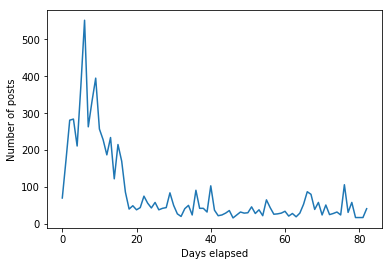

In [6]:
# Import necessary modules
from datetime import timedelta  
import matplotlib.pyplot as plt
import datetime

# Define current day and timedelta of 2 days
curr_day = datetime.datetime(2004, 5, 14, 0, 0)
lastday = datetime.datetime(2004, 10, 26, 0, 0)
td = timedelta(2)

# Initialize an empty list of posts by day
n_posts = []
while curr_day < lastday:
    if curr_day.day == 1:
        print(curr_day) 
    # Filter edges such that they are within the sliding time window: edges
    edges = [(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td]
    
    # Append number of edges to the n_posts list
    n_posts.append(len(edges))
    
    # Increment the curr_day by the time delta
    curr_day += td
    
# Create the plot
plt.plot(n_posts)  
plt.xlabel('Days elapsed')
plt.ylabel('Number of posts')
plt.show()  

**Extract the mean degree centrality day-by-day on the students partition**

2004-06-01 00:00:00
2004-07-01 00:00:00
2004-09-01 00:00:00
2004-10-01 00:00:00


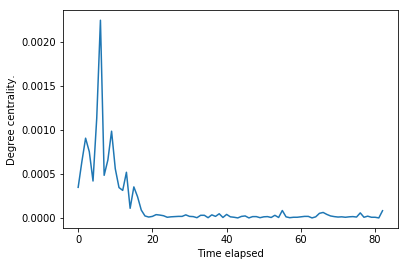

In [7]:
from datetime import timedelta
import datetime
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a new list: mean_dcs
mean_dcs = []
curr_day = datetime.datetime(2004, 5, 14, 0, 0)
lastday = datetime.datetime(2004, 10, 26, 0, 0)
td = timedelta(days=2)

while curr_day < lastday:
    if curr_day.day == 1:
        print(curr_day) 
    # Instantiate a new graph containing a subset of edges: G_sub
    G_sub = nx.Graph()
    # Add nodes from G
    G_sub.add_nodes_from(G.nodes(data=True))
    # Add in edges that fulfill the criteria
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td])
    
    # Get the students projection
    G_student_sub = nx.bipartite.projected_graph(G_sub, nodes=student_nodes)
    # Compute the degree centrality of the students projection
    dc = nx.degree_centrality(G_student_sub)
    # Append mean degree centrality to the list mean_dcs
    mean_dcs.append(np.mean(list(dc.values())))
    # Increment the time
    curr_day += td
    
plt.plot(mean_dcs)
plt.xlabel('Time elapsed')
plt.ylabel('Degree centrality.')
plt.show()

**Find the most popular forums day-by-day: I**

2004-06-01 00:00:00
2004-07-01 00:00:00
2004-08-01 00:00:00
2004-09-01 00:00:00
2004-10-01 00:00:00


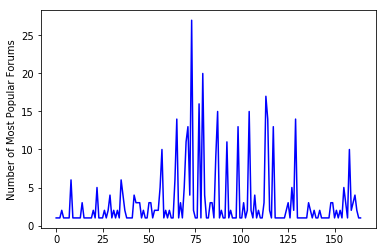

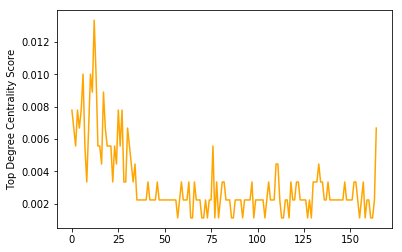

In [10]:
## part two
# Import necessary modules
from datetime import timedelta
import networkx as nx
import matplotlib.pyplot as plt

most_popular_forums = []
highest_dcs = []
curr_day = datetime.datetime(2004, 5, 14, 0, 0)
td = timedelta(days=1)  

while curr_day < lastday:  
    if curr_day.day == 1:  
        print(curr_day)  
    G_sub = nx.Graph()
    G_sub.add_nodes_from(G.nodes(data=True))   
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td])
    
    # Get the degree centrality 
    dc = nx.bipartite.degree_centrality(G_sub, forum_nodes)
    # Filter the dictionary such that there's only forum degree centralities
    forum_dcs = {n:dc for n, dc in dc.items() if n in forum_nodes}
    # Identify the most popular forum(s) 
    most_popular_forum = [n for n, dc in forum_dcs.items() if dc == max(forum_dcs.values()) and dc != 0]
    most_popular_forums.append(most_popular_forum) 
    
    # Store the highest dc values in highest_dcs
    highest_dcs.append(max(forum_dcs.values()))
    
    curr_day += td  
    
plt.figure(1) 
plt.plot([len(forums) for forums in most_popular_forums], color='blue', label='Forums')
plt.ylabel('Number of Most Popular Forums')
plt.show()

plt.figure(2)
plt.plot(highest_dcs, color='orange', label='DC Score')
plt.ylabel('Top Degree Centrality Score')
plt.show()